In [110]:
import  matplotlib.pyplot as plt
import numpy as np
import parse_active
import random
import math
import os, sys
import to_go_faster as tgf
import tools
import time

sys.path.append(os.path.relpath('../lib'))
from lib.ot_distances import Fused_Gromov_Wasserstein_distance
mutag_labels = ["C", "O", "Cl", "H", "N", "F", "Br", "S", "P", "I", "Na", "K", "Li", "Ca"]


In [115]:
def graph_distance(graph1, graph2, alpha=0.9):
        return Fused_Gromov_Wasserstein_distance(alpha=alpha, features_metric='dirac', method='shortest_path').graph_d(graph1, graph2)

In [116]:
rule = "23"
cls = 0
alpha = 0.90
a = "90"

In [117]:
path_to_active_egos = "../activ_ego/mutag_" + rule + "labels_egos.txt"
graphs_cls, means_number_of_nodes = parse_active.build_graphs_from_file(path_to_active_egos)
graphs = graphs_cls[cls]

Mean size of graphs: [9.14756447 9.59137056]


0.8228750000001526


In [88]:
path_to_distances_matrix = "../../distances_matrix/"
distances_matrix = tgf.load_matrix_from_txt(path_to_distances_matrix, rule, cls)
real_median_index = np.argmin(np.mean(distances_matrix, axis=0))
real_median_index

3407

In [121]:
print(graph_distance(graphs[0], graphs[3457], alpha=alpha))
print(distances_matrix[0, 3457])
print(distances_matrix[3457,0])

0.8228750000001526
1.0273750000029218
1.0273750000029218


In [89]:
def show_graph(i):
        distance_to_median = distances_matrix[real_median_index, i]
        tools.show_graph(tools.relabel_graph_to_mutag(graphs[i].nx_graph, mutag_labels), name="graph_" + str(i), layout="kamada_kawai", title="graph_" + str(i) + "\n Distance to the real median: " + str(distance_to_median), save=False)

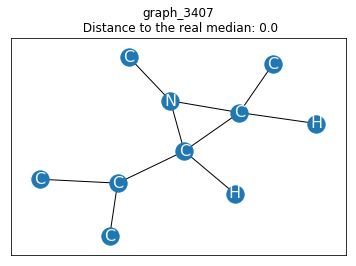

In [91]:
show_graph(real_median_index)

In [100]:
path_to_log = "./log/real_success2/" # complete the path
suffix= "_r"
extension = ".txt.gz"
specific_name= "r" + rule + "_a" + a + suffix + extension

In [101]:
selected_graph = np.loadtxt(path_to_log + "selected_graphs_index_"  + specific_name)
distances_to_real_median = np.loadtxt(path_to_log + "distances_to_real_median_" + specific_name)
computation_time = np.loadtxt(path_to_log + "computation_time_" + specific_name)
distances_to_mean = np.loadtxt(path_to_log + "distances_to_mean_" + specific_name)
median_over_iterations = np.loadtxt(path_to_log + "median_over_iterations_" + specific_name)

In [102]:
def show_plot(dist_real_median, comp_time, dist_mean, born_inf=0, borne_sup=len(graphs)):
        x = np.arange(born_inf, borne_sup)
        fig, ax1 = plt.subplots(figsize=(10,10))
        color = 'tab:blue'
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Distance to the real median', color=color)
        ax1.plot(x,dist_real_median[born_inf:borne_sup], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Computation time', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,comp_time[born_inf:borne_sup], color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:green'
        ax3.set_ylabel('Distance to the mean', color=color)  # we already handled the x-label with ax1
        ax3.plot(x,dist_mean[born_inf:borne_sup], color=color)
        ax3.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()

        fig = plt.figure(figsize=(10,10))
        plt.plot(x,dist_real_median[born_inf:borne_sup], 'blue')
        plt.show()

        fig = plt.figure(figsize=(10,10))
        plt.plot(x,comp_time[born_inf:borne_sup], 'red')
        plt.show()

        fig = plt.figure(figsize=(10,10))
        plt.plot(x,dist_mean[born_inf:borne_sup], 'green')
        plt.show()



        fig, ax = plt.subplots(figsize=(10,10))
        color = 'tab:blue'
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Distance to the real median', color=color)
        ax.plot(x,dist_real_median[born_inf:borne_sup], color=color)
        ax.tick_params(axis='y', labelcolor=color)
        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:orange'
        ax2.set_ylabel('mean_graph_index', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,median_over_iterations[born_inf:borne_sup], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()

        plt.figure(figsize=(10,10))
        plt.plot(median_over_iterations[born_inf:borne_sup], 'orange')
        plt.show()

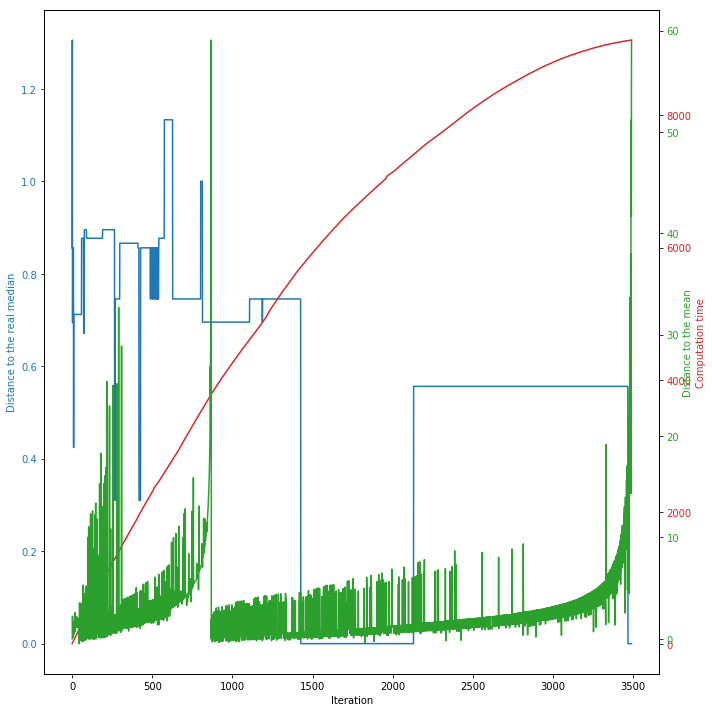

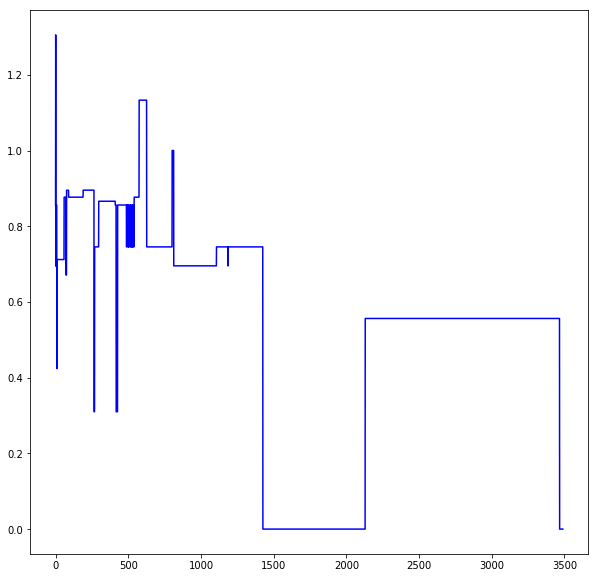

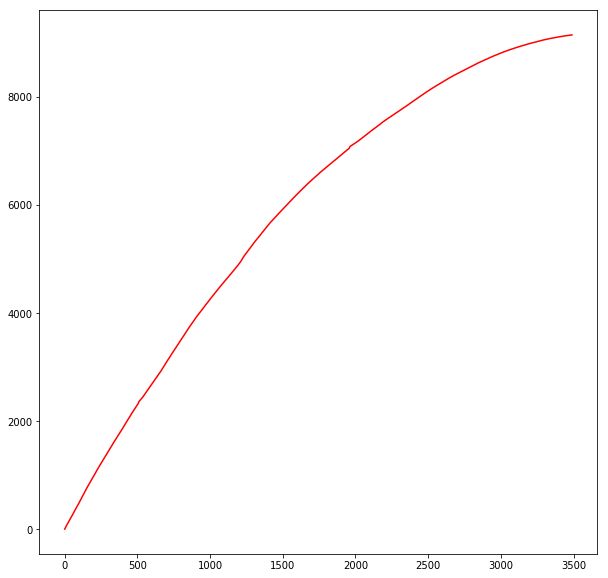

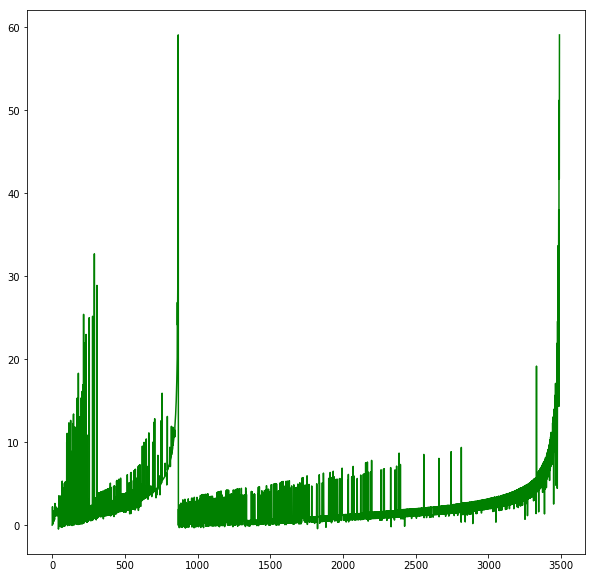

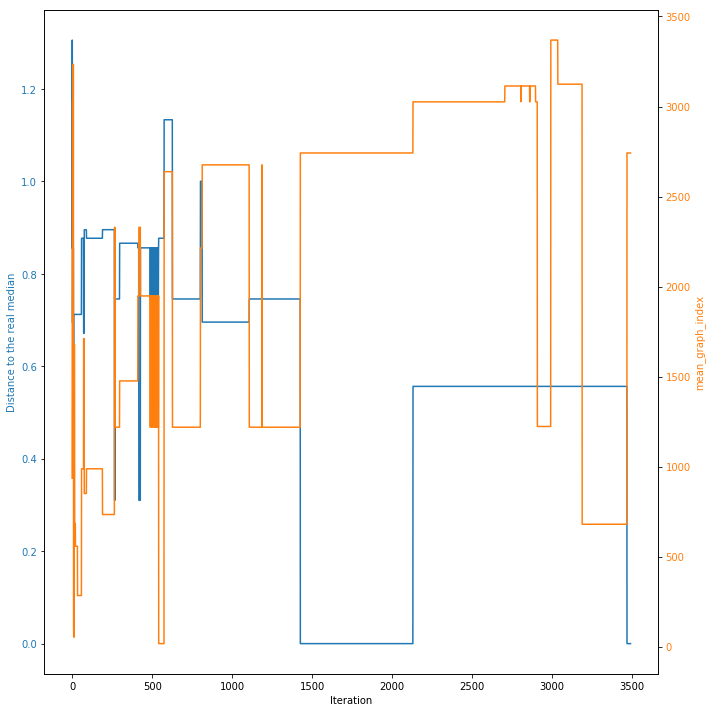

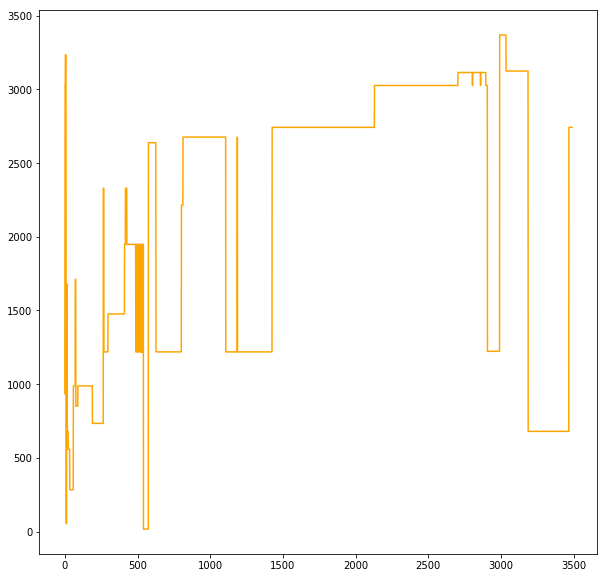

In [103]:
show_plot(distances_to_real_median, computation_time, distances_to_mean, born_inf=0, borne_sup=len(distances_to_real_median))

In [38]:
print(selected_graph[802])
print(median_over_iterations[802])

968.0


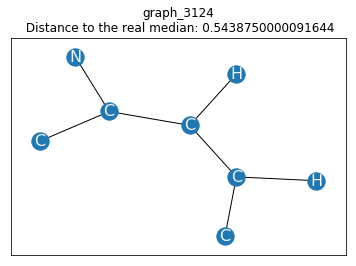

0.5563750000086595


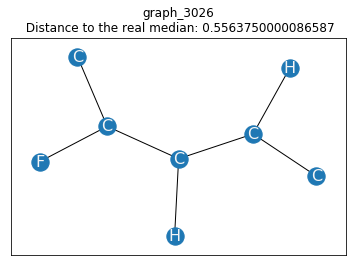

0.5563750000086594


In [78]:
show_graph(int(median_over_iterations[3100]))
print(distances_to_real_median[3100])
show_graph(int(median_over_iterations[2400]))
print(distances_to_real_median[2400])